In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

## Train Data

In [2]:
df=pd.read_csv(r"C:\Users\AYUSHI\Desktop\Flip Robo\Data Trained Projects\bigdatamart_Train.csv")

In [3]:
df['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

In [4]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [5]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [6]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [8]:
df['Item_Weight']=df['Item_Weight'].replace('',np.nan)

In [9]:
df['Item_Weight']=df['Item_Weight'].fillna(np.mean(df["Item_Weight"]))

In [10]:
df['Outlet_Size']=df['Outlet_Size'].replace('',np.nan)

In [11]:
from statistics import mode
df['Outlet_Size']=df['Outlet_Size'].fillna(mode(df["Outlet_Size"]))

In [12]:
df['Outlet_Establishment_Year']= 2022-df['Outlet_Establishment_Year']

In [13]:
df.rename(columns={"Outlet_Establishment_Year":"Outlet_Age"},inplace=True)

In [14]:
df.isnull().sum()

Item_Identifier         0
Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Identifier       0
Outlet_Age              0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
Item_Outlet_Sales       0
dtype: int64

In [15]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [16]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [17]:
hp1=df.drop("Item_Identifier",axis=1)
Sales=hp1.drop("Outlet_Identifier",axis=1)

In [18]:
Sales

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Age,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,0.0,0.016047,4.0,249.8092,23,1.0,0.0,1.0,3735.1380
1,5.920,1.0,0.019278,14.0,48.2692,13,1.0,2.0,2.0,443.4228
2,17.500,0.0,0.016760,10.0,141.6180,23,1.0,0.0,1.0,2097.2700
3,19.200,1.0,0.000000,6.0,182.0950,24,1.0,2.0,0.0,732.3800
4,8.930,0.0,0.000000,9.0,53.8614,35,0.0,2.0,1.0,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.0,0.056783,13.0,214.5218,35,0.0,2.0,1.0,2778.3834
8519,8.380,1.0,0.046982,0.0,108.1570,20,1.0,1.0,1.0,549.2850
8520,10.600,0.0,0.035186,8.0,85.1224,18,2.0,1.0,1.0,1193.1136
8521,7.210,1.0,0.145221,13.0,103.1332,13,1.0,2.0,2.0,1845.5976


In [19]:
Sales.corr()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Age,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Weight,1.000000,-0.021157,-0.012049,0.028015,0.024756,0.008301,-0.007225,0.004088,-0.000566,0.011550
Item_Fat_Content,-0.021157,1.000000,0.047314,-0.139434,0.006063,-0.003151,-0.000622,-0.001598,0.002199,0.018719
Item_Visibility,-0.012049,0.047314,1.000000,-0.035249,-0.001315,0.074834,0.069309,-0.028099,-0.173468,-0.128625
Item_Type,0.028015,-0.139434,-0.035249,1.000000,0.032651,-0.004970,-0.001859,0.003084,0.003053,0.017048
Item_MRP,0.024756,0.006063,-0.001315,0.032651,1.000000,-0.005020,0.006059,0.000232,-0.001975,0.567574
Outlet_Age,0.008301,-0.003151,0.074834,-0.004970,-0.005020,1.000000,-0.193389,0.089216,0.122304,0.049135
Outlet_Size,-0.007225,-0.000622,0.069309,-0.001859,0.006059,-0.193389,1.000000,-0.614311,-0.201483,-0.086182
Outlet_Location_Type,0.004088,-0.001598,-0.028099,0.003084,0.000232,0.089216,-0.614311,1.000000,0.467219,0.089367
Outlet_Type,-0.000566,0.002199,-0.173468,0.003053,-0.001975,0.122304,-0.201483,0.467219,1.000000,0.401522
Item_Outlet_Sales,0.011550,0.018719,-0.128625,0.017048,0.567574,0.049135,-0.086182,0.089367,0.401522,1.000000


In [20]:
Sales.corr()['Item_Outlet_Sales'].sort_values(ascending=False)

Item_Outlet_Sales       1.000000
Item_MRP                0.567574
Outlet_Type             0.401522
Outlet_Location_Type    0.089367
Outlet_Age              0.049135
Item_Fat_Content        0.018719
Item_Type               0.017048
Item_Weight             0.011550
Outlet_Size            -0.086182
Item_Visibility        -0.128625
Name: Item_Outlet_Sales, dtype: float64

<AxesSubplot:>

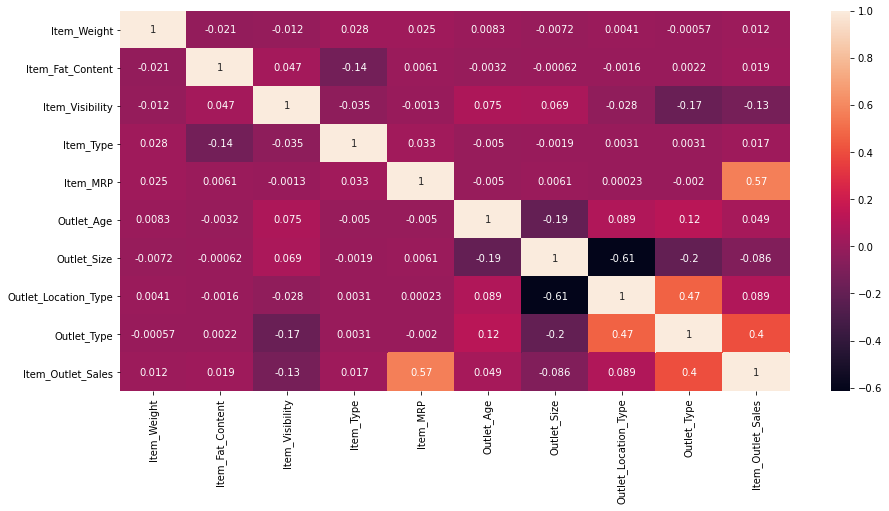

In [21]:
import matplotlib.pyplot as plt  
plt.figure(figsize=(15,7))
sns.heatmap(Sales.corr(),annot=True)

In [22]:
Sales.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Age,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.352693,0.066132,7.226681,140.992782,24.168133,1.170832,1.112871,1.201220,2181.288914
std,4.226124,0.477836,0.051598,4.209990,62.275067,8.371760,0.600327,0.812757,0.796459,1706.499616
min,4.555000,0.000000,0.000000,0.000000,31.290000,13.000000,0.000000,0.000000,0.000000,33.290000
25%,9.310000,0.000000,0.026989,4.000000,93.826500,18.000000,1.000000,0.000000,1.000000,834.247400
50%,12.857645,0.000000,0.053931,6.000000,143.012800,23.000000,1.000000,1.000000,1.000000,1794.331000
75%,16.000000,1.000000,0.094585,10.000000,185.643700,35.000000,2.000000,2.000000,1.000000,3101.296400
max,21.350000,1.000000,0.328391,15.000000,266.888400,37.000000,2.000000,2.000000,3.000000,13086.964800


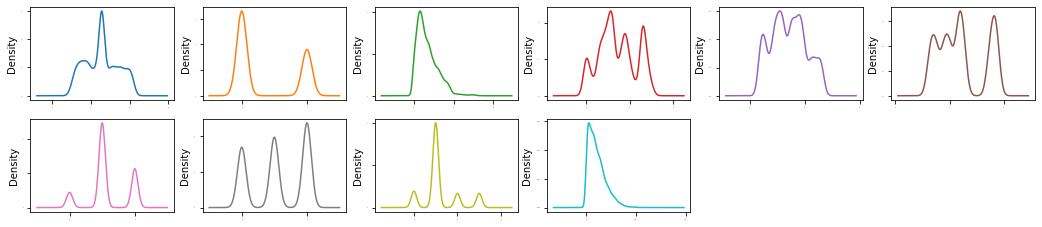

In [23]:
Sales.plot(kind='density',subplots=True,layout=(6,6),sharex=False,legend=False, fontsize=1,figsize=(18,12))
plt.show()

In [63]:
x=Sales.drop("Item_Outlet_Sales",axis=1)
y=Sales["Item_Outlet_Sales"]

In [64]:
x.skew().sort_values(ascending=False)

Item_Visibility         1.167091
Outlet_Type             0.927438
Item_Fat_Content        0.616705
Outlet_Age              0.396641
Item_MRP                0.127202
Item_Type               0.101655
Item_Weight             0.090561
Outlet_Size            -0.087072
Outlet_Location_Type   -0.209093
dtype: float64

In [65]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x)

In [66]:
type(x_new)

numpy.ndarray

In [67]:
x=pd.DataFrame(x_new,columns=x.columns)

In [68]:
x

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Age,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,-0.822636,-0.738147,-1.146886,-0.712347,1.623670,0.031049,-0.293295,-1.373843,-0.123488
1,-1.733801,1.354743,-1.037100,1.504660,-1.595016,-1.593876,-0.293295,1.088324,1.040591
2,1.086362,-0.738147,-1.122375,0.684390,0.081237,0.031049,-0.293295,-1.373843,-0.123488
3,1.447728,1.354743,-1.745551,-0.215420,0.689968,0.152703,-0.293295,1.088324,-1.915952
4,-0.917588,-0.738147,-1.745551,0.468410,-1.476078,1.230673,-1.925925,1.088324,-0.123488
...,...,...,...,...,...,...,...,...,...
8518,-1.468096,-0.738147,0.020310,1.305304,1.148258,1.230673,-1.925925,1.088324,-0.123488
8519,-1.060659,1.354743,-0.221388,-1.923750,-0.463127,-0.368273,-0.293295,-0.131113,-0.123488
8520,-0.496556,-0.738147,-0.542979,0.246996,-0.867930,-0.668963,1.390694,-0.131113,-0.123488
8521,-1.373443,1.354743,1.459990,1.305304,-0.548996,-1.593876,-0.293295,1.088324,1.040591


In [69]:
x.skew().sort_values(ascending=False)

Item_Fat_Content        0.616705
Item_Visibility         0.124279
Outlet_Type             0.007863
Outlet_Age              0.005187
Outlet_Size            -0.042980
Item_Weight            -0.068024
Item_MRP               -0.115386
Item_Type              -0.164574
Outlet_Location_Type   -0.220632
dtype: float64

In [70]:
sk=x.skew()

In [71]:
sk[np.abs(sk)>0.25].all()

True

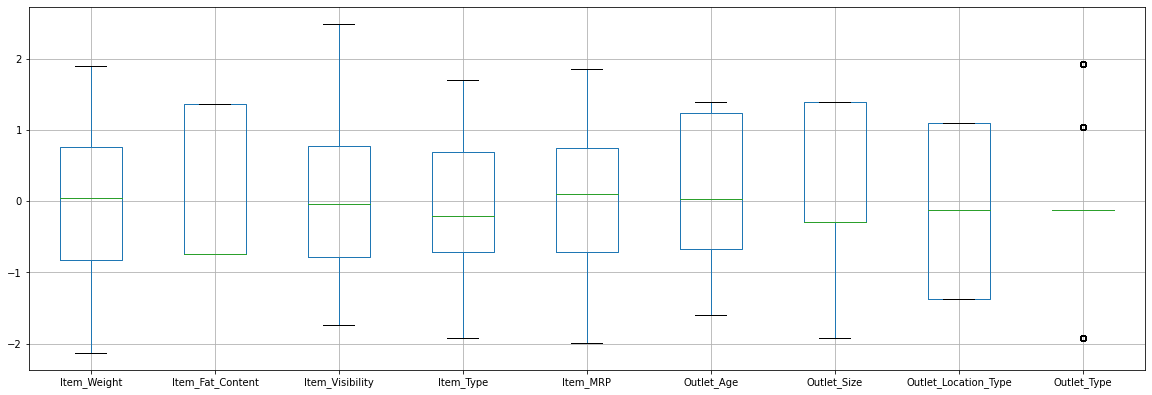

In [72]:
x.iloc[:,0:11].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [73]:
from scipy.stats import zscore
(np.abs(zscore(x_train))<3).all()

True

In [74]:
x

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Age,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,-0.822636,-0.738147,-1.146886,-0.712347,1.623670,0.031049,-0.293295,-1.373843,-0.123488
1,-1.733801,1.354743,-1.037100,1.504660,-1.595016,-1.593876,-0.293295,1.088324,1.040591
2,1.086362,-0.738147,-1.122375,0.684390,0.081237,0.031049,-0.293295,-1.373843,-0.123488
3,1.447728,1.354743,-1.745551,-0.215420,0.689968,0.152703,-0.293295,1.088324,-1.915952
4,-0.917588,-0.738147,-1.745551,0.468410,-1.476078,1.230673,-1.925925,1.088324,-0.123488
...,...,...,...,...,...,...,...,...,...
8518,-1.468096,-0.738147,0.020310,1.305304,1.148258,1.230673,-1.925925,1.088324,-0.123488
8519,-1.060659,1.354743,-0.221388,-1.923750,-0.463127,-0.368273,-0.293295,-0.131113,-0.123488
8520,-0.496556,-0.738147,-0.542979,0.246996,-0.867930,-0.668963,1.390694,-0.131113,-0.123488
8521,-1.373443,1.354743,1.459990,1.305304,-0.548996,-1.593876,-0.293295,1.088324,1.040591


In [75]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

## Test Data

In [37]:
df1=pd.read_csv(r"C:\Users\AYUSHI\Desktop\Flip Robo\Data Trained Projects\bigdatamart_Test.csv")

In [38]:
df1['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

In [39]:
df1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [40]:
df1.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [41]:
df1.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [42]:
df1.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [43]:
df1['Item_Weight']=df1['Item_Weight'].replace('',np.nan)

In [44]:
df1['Item_Weight']=df1['Item_Weight'].fillna(np.mean(df1["Item_Weight"]))

In [45]:
df1['Outlet_Size']=df1['Outlet_Size'].replace('',np.nan)

In [46]:
from statistics import mode
df1['Outlet_Size']=df1['Outlet_Size'].fillna(mode(df1["Outlet_Size"]))

In [47]:
df1['Outlet_Establishment_Year']= 2022-df1['Outlet_Establishment_Year']

In [48]:
df1.rename(columns={"Outlet_Establishment_Year":"Outlet_Age"},inplace=True)

In [49]:
df1.isnull().sum()

Item_Identifier         0
Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Identifier       0
Outlet_Age              0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
dtype: int64

In [50]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [51]:
for i in df1.columns:
    if df1[i].dtypes=="object":
        df1[i]=enc.fit_transform(df1[i].values.reshape(-1,1))

In [52]:
df1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Age,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103.0,20.750000,0.0,0.007565,13.0,107.8622,9.0,23,1.0,0.0,1.0
1,1067.0,8.300000,1.0,0.038428,4.0,87.3198,2.0,15,1.0,1.0,1.0
2,1406.0,14.600000,0.0,0.099575,11.0,241.7538,0.0,24,1.0,2.0,0.0
3,809.0,7.315000,0.0,0.015388,13.0,155.0340,2.0,15,1.0,1.0,1.0
4,1184.0,12.695633,1.0,0.118599,4.0,234.2300,5.0,37,1.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
5676,231.0,10.500000,1.0,0.013496,13.0,141.3154,8.0,25,2.0,0.0,1.0
5677,306.0,7.600000,1.0,0.142991,15.0,169.1448,3.0,13,1.0,2.0,2.0
5678,1412.0,10.000000,0.0,0.073529,8.0,118.7440,7.0,20,1.0,1.0,1.0
5679,517.0,15.300000,1.0,0.000000,3.0,214.6218,2.0,15,1.0,1.0,1.0


In [53]:
hp1=df1.drop("Item_Identifier",axis=1)
Sales1=hp1.drop("Outlet_Identifier",axis=1)

In [76]:
Sales1

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Age,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,0.0,0.007565,13.0,107.8622,23,1.0,0.0,1.0
1,8.300000,1.0,0.038428,4.0,87.3198,15,1.0,1.0,1.0
2,14.600000,0.0,0.099575,11.0,241.7538,24,1.0,2.0,0.0
3,7.315000,0.0,0.015388,13.0,155.0340,15,1.0,1.0,1.0
4,12.695633,1.0,0.118599,4.0,234.2300,37,1.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...
5676,10.500000,1.0,0.013496,13.0,141.3154,25,2.0,0.0,1.0
5677,7.600000,1.0,0.142991,15.0,169.1448,13,1.0,2.0,2.0
5678,10.000000,0.0,0.073529,8.0,118.7440,20,1.0,1.0,1.0
5679,15.300000,1.0,0.000000,3.0,214.6218,15,1.0,1.0,1.0


## Model Building

In [77]:
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.metrics import r2_score

In [78]:
for i in range (0,2000) :
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_test=lr.predict(x_test)
    pred_train=lr.predict(x_train)
    print(f"at random state {i},the training accuracy is :{r2_score(y_train,pred_train)}")
    print(f"at random state {i},the testing accuracy is :{r2_score(y_test,pred_test)}") 
    print("\n")

at random state 0,the training accuracy is :0.5220218592679058
at random state 0,the testing accuracy is :0.530570416862637


at random state 1,the training accuracy is :0.5238041749232223
at random state 1,the testing accuracy is :0.522944359672471


at random state 2,the training accuracy is :0.5268093390616804
at random state 2,the testing accuracy is :0.5110560663306636


at random state 3,the training accuracy is :0.5152655919673347
at random state 3,the testing accuracy is :0.5565406676803193


at random state 4,the training accuracy is :0.5267375998380377
at random state 4,the testing accuracy is :0.5094249357464465


at random state 5,the training accuracy is :0.5267329360735904
at random state 5,the testing accuracy is :0.5116537006471629


at random state 6,the training accuracy is :0.5250139049967566
at random state 6,the testing accuracy is :0.5179577936233275


at random state 7,the training accuracy is :0.5287425631919145
at random state 7,the testing accuracy is :0.50512

In [114]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [80]:
x_train.shape

(6818, 9)

In [81]:
y_train.shape

(6818,)

In [82]:
x_test.shape

(1705, 9)

In [83]:
y_test.shape

(1705,)

In [115]:
lr.fit(x_train,y_train)

LinearRegression()

In [116]:
pred_test=lr.predict(x_test)

In [119]:
print(r2_score(y_test,pred_test))

0.5371055515939116


## CROSS VALIDATION

In [120]:
Train_accuracy=r2_score(y_train,pred_train)
Test_accuracy=r2_score(y_test,pred_test)
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy}and accuracy score for testing is {Test_accuracy}')
    print('\n')      

At cross fold 2 the cv score is 0.522333453528526 and accuracy score for training is -0.5004872363478188and accuracy score for testing is 0.5371055515939116


At cross fold 3 the cv score is 0.5223971993262042 and accuracy score for training is -0.5004872363478188and accuracy score for testing is 0.5371055515939116


At cross fold 4 the cv score is 0.5209890807573199 and accuracy score for training is -0.5004872363478188and accuracy score for testing is 0.5371055515939116


At cross fold 5 the cv score is 0.5219623586126166 and accuracy score for training is -0.5004872363478188and accuracy score for testing is 0.5371055515939116


At cross fold 6 the cv score is 0.5218165593128229 and accuracy score for training is -0.5004872363478188and accuracy score for testing is 0.5371055515939116


At cross fold 7 the cv score is 0.5223415109635641 and accuracy score for training is -0.5004872363478188and accuracy score for testing is 0.5371055515939116


At cross fold 8 the cv score is 0.5216037

## Plot the Data

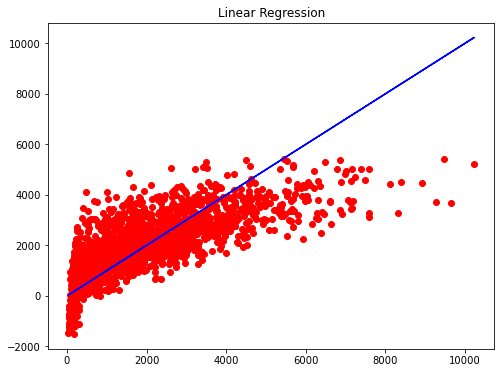

In [121]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.title("Linear Regression")
plt.show()

In [89]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings 
warnings.filterwarnings('ignore')

In [90]:
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [91]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
lss=r2_score(y_test,pred_ls)
lss

0.5225412684694448

In [92]:
cv_score=cross_val_score(ls,x,y,cv=3)
cv_mean=cv_score.mean()
cv_mean

0.5224025385913204

## Ensemble technique:

In [93]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [94]:
parameters = {'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'log2'}


In [139]:
rf=RandomForestRegressor(criterion='mae',max_features='log2')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)


rfs=r2_score(y_test,pred_decision)
print('R2 score:',rfs*100)

rfscore=cross_val_score(rf,x,y,cv=3)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

R2 score: 58.95592096825699
Cross Val Score: 57.29913622941544


## we are getting our model accuracy around 58.95% and cross validation around 57.2 % which shows our model is performing good

In [130]:
import pickle

In [131]:
filename='Big_Data_Mart.pkl'
pickle.dump(rf, open(filename,'wb'))

# Conclusion:

In [132]:
loaded_model= pickle.load(open('Big_Data_Mart.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result)

0.5879543921432097


In [136]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=["predicted","original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,1695,1696,1697,1698,1699,1700,1701,1702,1703,1704
predicted,982.028368,907.169145,716.840228,4092.193224,2810.30851,551.631945,5558.86407,2167.698324,1319.692167,2957.846461,...,1336.843175,836.604332,1970.20207,3031.756919,3141.151188,1978.19167,1823.909165,724.097448,606.71025,1565.698609
original,982.028368,907.169145,716.840228,4092.193224,2810.30851,551.631945,5558.86407,2167.698324,1319.692167,2957.846461,...,1336.843175,836.604332,1970.20207,3031.756919,3141.151188,1978.19167,1823.909165,724.097448,606.71025,1565.698609


## Testing the model with the provided test data

In [140]:
model_test=pd.DataFrame(loaded_model.predict(Sales1))
model_test

,0
0,4797.561718
1,4763.705788
2,4075.308536
3,4573.653178
4,4930.761666
...,...
5676,5021.643366
5677,4930.761666
5678,4542.180812
5679,5008.314050


In [141]:
result = pd.DataFrame()
target_var=loaded_model.predict(Sales1)

result["Item_Outlet_Sales"] = target_var
result = result.sort_index()
result.to_csv('Bigmart_model.csv',index = False)